# 0.&nbsp;Prepare

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_segment = pd.read_csv('https://raw.githubusercontent.com/kieuthutran/RFM-Analysis/refs/heads/main/segmentation.csv')
df_ecom = pd.read_csv('https://raw.githubusercontent.com/kieuthutran/RFM-Analysis/refs/heads/main/ecommerce_retail.csv', encoding='latin-1')
df_ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 1.&nbsp;EDA

## 1.1. Datatype

In [ ]:
df_ecom.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


Cần chuyển đổi datatype các cột:
* 'InvoiceDate' sang datetime
* 'CustomerID' sang string (object)

In [ ]:
# Cột 'InvoiceDate'
df_ecom['InvoiceDate'] = pd.to_datetime(df_ecom['InvoiceDate'])
# Cột 'CustomerID'
df_ecom['CustomerID'] = df_ecom['CustomerID'].fillna(0).astype(int).astype(str)
df_ecom['CustomerID'] = df_ecom['CustomerID'].replace('0', np.nan)

df_ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom


In [ ]:
# Kiểm tra lại datatype
df_ecom.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object


## 1.2. Missing data

In [ ]:
df_ecom.isna().mean().sort_values()

,0
InvoiceNo,0.000000
StockCode,0.000000
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
Country,0.000000
Description,0.002683
CustomerID,0.249267


Bảng data đang missing ở 2 cột:
* Cột **'Description'** không ảnh hưởng nhiều đến phân tích RFM, do đó giữ nguyên
* Cột **'CustomerID'** chứa thông tin khách hàng để tính điểm RFM, không có thông tin tham khảo để fill missing, do đó xóa những dòng null

In [ ]:
df_ecom[df_ecom['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
613,536412,22468,BABUSHKA LIGHTS STRING OF 10,2,2010-01-12,6.75,NaN,United Kingdom
1431,536542,20712,JUMBO BAG WOODLAND ANIMALS,20,2010-01-12,1.95,NaN,United Kingdom
1432,536542,85099F,JUMBO BAG STRAWBERRY,30,2010-01-12,1.95,NaN,United Kingdom
1433,536542,85099C,JUMBO BAG BAROQUE BLACK WHITE,20,2010-01-12,1.95,NaN,United Kingdom
1434,536542,21930,JUMBO STORAGE BAG SKULLS,20,2010-01-12,1.95,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541289,581497,22383,LUNCH BAG SUKI DESIGN,2,2011-09-12,4.96,NaN,United Kingdom
541490,581498,23312,VINTAGE CHRISTMAS GIFT SACK,3,2011-09-12,8.29,NaN,United Kingdom
541578,581502,22155,STAR DECORATION RUSTIC,6,2011-09-12,0.42,NaN,United Kingdom
541682,581538,23040,PAPER LANTERN 9 POINT SNOW STAR,2,2011-09-12,5.75,NaN,United Kingdom


In [ ]:
# Drop rows with missing CustomerID
df_ecom.dropna(subset=['CustomerID'], how = 'all' , inplace=True)

## 1.3. Duplicated data

In [ ]:
df_ecom.duplicated().sum()

5225

In [ ]:
df_ecom.drop_duplicates(inplace=True)
df_ecom.duplicated().sum()

0

## 1.4. Incorrect value

In [ ]:
display(df_ecom.describe())
display(df_ecom.describe(exclude="number"))

,Quantity,UnitPrice
count,538261.000000,538261.000000
mean,9.597474,4.625567
std,218.800840,97.086843
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
count,538261,538261,536807,538261,404469,538261
unique,25900,4070,4223,305,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-05-12,17841,United Kingdom
freq,1114,2305,2361,5302,7899,491888


Các cột **'Quantity'** và **'UnitPrice'** đang có một vài giá trị **âm** --> cần chuyển sang giá trị dương

In [ ]:
df_ecom['Quantity'] = df_ecom['Quantity'].abs()
df_ecom['UnitPrice'] = df_ecom['UnitPrice'].abs()
display(df_ecom.describe())

,Quantity,InvoiceDate,UnitPrice
count,401604.000000,401604,401604.000000
mean,13.542995,2011-06-21 05:29:50.692323840,3.474064
min,1.000000,2010-01-12 08:26:00,0.000000
25%,2.000000,2011-03-30 11:39:00,1.250000
50%,6.000000,2011-07-08 13:08:00,1.950000
75%,12.000000,2011-10-08 16:39:00,3.750000
max,80995.000000,2011-12-10 17:19:00,38970.000000
std,250.213145,NaN,69.764035


In [ ]:
df_ecom[['Quantity','UnitPrice']].agg(['mean','median'])

,Quantity,UnitPrice
mean,11.418333,4.715115
median,3.000000,2.080000


Qua phương thức Describe phía trên, ta thấy cột **'Quantity'** và **'UnitPrice'** có các giá trị min-max bất thường, khác xa so với tập dữ liệu còn lại trong cột --> Cần kiểm tra và loại bỏ giá trị ngoại lai

In [ ]:
# Ham xoa du lieu ngoai lai (outlier)
def remove_outlier(x):
    x = np.array(x, dtype=float)

    k = 1.5
    q1, q3 = np.quantile(x, [0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr

    x[(x < lower) | (x > upper)] = np.nan
    return x

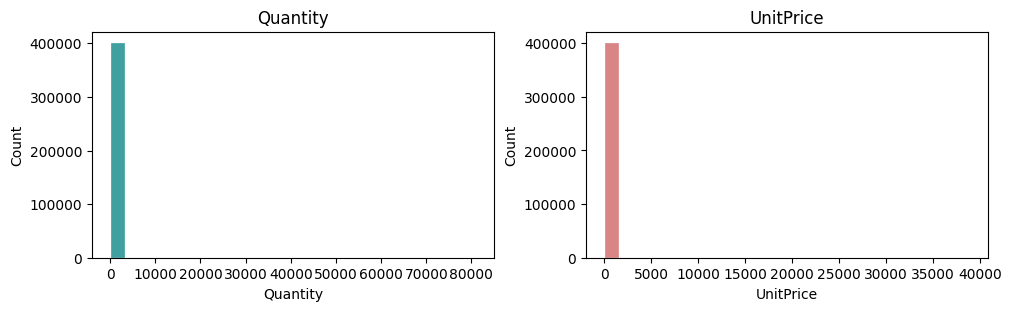

In [ ]:
# Kiểm tra phân bố 2 biến 'Quantity' và 'UnitPrice':
fig, ax = plt.subplots(figsize=(10,3), ncols=2, constrained_layout=True)
sns.histplot(df_ecom, x='Quantity', color='teal', edgecolor='w', bins=25, ax=ax[0])
sns.histplot(df_ecom, x='UnitPrice', color='indianred', edgecolor='w', bins=25, ax=ax[1])
ax[0].set_title('Quantity')
ax[1].set_title('UnitPrice')
plt.show()

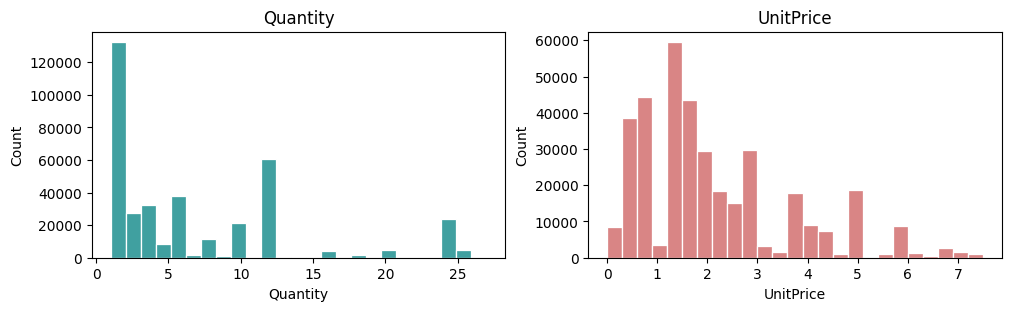

In [ ]:
# Loại bỏ giá trị ngoại lai của 2 biến 'Quantity' và 'UnitPrice':
df_ecom['Quantity'] = remove_outlier(df_ecom['Quantity'])
df_ecom['UnitPrice'] = remove_outlier(df_ecom['UnitPrice'])

# Kiểm tra lại phân bố của 2 biến 'Quantity' và 'UnitPrice' sau khi loại bỏ giá trị ngoại lai:
fig, ax = plt.subplots(figsize=(10,3), ncols=2, constrained_layout=True)
sns.histplot(df_ecom, x='Quantity', color='teal', edgecolor='w', bins=25, ax=ax[0])
sns.histplot(df_ecom, x='UnitPrice', color='indianred', edgecolor='w', bins=25, ax=ax[1])
ax[0].set_title('Quantity')
ax[1].set_title('UnitPrice')
plt.show()

## 1.5. Filtering data

In [ ]:
df_ecom = df_ecom[df_ecom['Quantity'] > 0]
df_ecom = df_ecom[df_ecom['UnitPrice'] > 0]

In [ ]:
df_ecom['Country'].value_counts()

,count
Country,
United Kingdom,490299
Germany,9480
France,8541
EIRE,8184
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1994
Portugal,1510


Ta thấy phần lớn dữ liệu ghi nhận transactions ở khu vực **United Kingdom** (chiếm hơn 90%), do đó để tránh mất cân bằng dữ liệu, trong bài phân tích này, ta chỉ xét các transactions ở United Kingdom (tạm bỏ qua các quốc gia khác)

In [ ]:
df_ecom = df_ecom[df_ecom['Country'] == 'United Kingdom']
df_ecom.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom


# 2.&nbsp;RFM

## 2.1. R_score, F_score, M_score

Tạo bảng **User**

In [ ]:
# Create dataframe User
df_user = pd.DataFrame(df_ecom['CustomerID'].unique())
df_user.rename(columns={0: 'CustomerID'}, inplace=True)

In [ ]:
# Calculate Recency
df_recency = df_ecom.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_recency['Recency'] = df_recency['InvoiceDate'].apply(lambda x: (dt.date(2011, 12, 31) - x.date()).days)

df_user = df_user.merge(df_recency, on='CustomerID', how='left')
df_user.drop(columns='InvoiceDate', inplace=True)

In [ ]:
# Calculate Frequency
df_frequency = df_ecom.groupby('CustomerID')['InvoiceNo'].count().reset_index()

df_user = df_user.merge(df_frequency, on='CustomerID', how='left')
df_user.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

In [ ]:
# Calculate Monetary
df_ecom['TotalPay'] = df_ecom['Quantity'] * df_ecom['UnitPrice']
df_monetary = df_ecom.groupby('CustomerID')['TotalPay'].sum().reset_index()

df_user = df_user.merge(df_monetary, on='CustomerID', how='left')
df_user.rename(columns={'TotalPay': 'Monetary'}, inplace=True)

Áp dụng phương pháp **Quartile** để chia tập dữ liệu của các cột **'Recency'**, **'Frequency'**, **'Monetary'** thành các phần có kích thước bằng nhau và đánh điểm từ 1-5 cho từng phần

In [ ]:
# Chia biến Recency thành 5 phần, tính phân vị 20%, 40%, 60%, 80%
r1, r2, r3, r4 = df_user['Recency'].quantile([0.2, 0.4, 0.6, 0.8])
# Gán điểm cho mỗi khoảng phân vị
df_user['R_score'] = df_user['Recency'].apply(lambda x: 5 if x < r1
                                                               else 4 if (r1 <= x) & (x < r2)
                                                               else 3 if (r2 <= x) & (x < r3)
                                                               else 2 if (r3 <= x) & (x < r4)
                                                               else 1)
# Kiểm tra số lượng bản ghi trong mỗi khoảng phân vị của biến Recency
x = df_user['Recency']
n1 = (x < r1).sum()
n2 = ((r1 <= x) & (x < r2)).sum()
n3 = ((r2 <= x) & (x < r3)).sum()
n4 = ((r3 <= x) & (x < r4)).sum()
n5 = (x >= r4).sum()

print(f'Bốn điểm phân vị của biến Recency là: {r1} - {r2} - {r3} - {r4}')
print(f'Số lượng bản ghi trong mỗi khoảng phân vị: {n1} - {n2} - {n3} - {n4} - {n5}')

Bốn điểm phân vị của biến Recency là: 38.0 - 61.0 - 102.0 - 204.0
Số lượng bản ghi trong mỗi khoảng phân vị: 727 - 779 - 779 - 754 - 774


In [ ]:
# Chia biến Frequency thành 5 phần, tính phân vị 20%, 40%, 60%, 80%
f1, f2, f3, f4 = df_user['Frequency'].quantile([0.2, 0.4, 0.6, 0.8])
# Gán điểm cho mỗi khoảng phân vị
df_user['F_score'] = df_user['Frequency'].apply(lambda x: 1 if x < f1
                                                               else 2 if (f1 <= x) & (x < f2)
                                                               else 3 if (f2 <= x) & (x < f3)
                                                               else 4 if (f3 <= x) & (x < f4)
                                                               else 5)
# Kiểm tra số lượng bản ghi trong mỗi khoảng phân vị của biến Frequency
x = df_user['Frequency']
n1 = (x < f1).sum()
n2 = ((f1 <= x) & (x < f2)).sum()
n3 = ((f2 <= x) & (x < f3)).sum()
n4 = ((f3 <= x) & (x < f4)).sum()
n5 = (x >= f4).sum()

print(f'Bốn điểm phân vị của biến Frequency là: {f1} - {f2} - {f3} - {f4}')
print(f'Số lượng bản ghi trong mỗi khoảng phân vị: {n1} - {n2} - {n3} - {n4} - {n5}')

Bốn điểm phân vị của biến Frequency là: 11.0 - 25.800000000000182 - 52.0 - 107.0
Số lượng bản ghi trong mỗi khoảng phân vị: 700 - 825 - 760 - 757 - 771


In [ ]:
# Chia biến Monetary thành 5 phần, tính phân vị 20%, 40%, 60%, 80%
m1, m2, m3, m4 = df_user['Monetary'].quantile([0.2, 0.4, 0.6, 0.8])
# Gán điểm cho mỗi khoảng phân vị
df_user['M_score'] = df_user['Monetary'].apply(lambda x: 1 if x < m1
                                                               else 2 if (m1 <= x) & (x < m2)
                                                               else 3 if (m2 <= x) & (x < m3)
                                                               else 4 if (m3 <= x) & (x < m4)
                                                               else 5)
# Kiểm tra số lượng bản ghi trong mỗi khoảng phân vị của biến Monetary
x = df_user['Monetary']
n1 = (x < m1).sum()
n2 = ((m1 <= x) & (x < m2)).sum()
n3 = ((m2 <= x) & (x < m3)).sum()
n4 = ((m3 <= x) & (x < m4)).sum()
n5 = (x >= m4).sum()

print(f'Bốn điểm phân vị của biến Monetary là: {m1} - {m2} - {m3} - {m4}')
print(f'Số lượng bản ghi trong mỗi khoảng phân vị: {n1} - {n2} - {n3} - {n4} - {n5}')

Bốn điểm phân vị của biến Monetary là: 158.52 - 325.992 - 618.552 - 1363.4320000000014
Số lượng bản ghi trong mỗi khoảng phân vị: 763 - 762 - 763 - 762 - 763


## 2.2. RFM_score & Segment

### RFM_score

In [ ]:
df_user = df_user.astype({
    'R_score': str,
    'F_score': str,
    'M_score': str
})
df_user.dtypes

CustomerID     object
Recency         int64
Frequency       int64
Monetary      float64
R_score        object
F_score        object
M_score        object
dtype: object

In [ ]:
df_user['RFM_score'] = df_user['R_score'] + df_user['F_score'] + df_user['M_score']
df_user['RFM_score'] = df_user['RFM_score'].astype(int)
df_user.head(2)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,17850,90,285,4549.89,3,5,5,355
1,13047,68,169,2754.55,3,5,5,355


### Join with Segment

In [ ]:
def map_segment(score):
    if score in [555, 554, 544, 545, 454, 455, 445]:
        segment = 'Champions'
    elif score in [543, 444, 435, 355, 354, 345, 344, 335]:
        segment = 'Loyal'
    elif score in [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]:
        segment = 'Potential Loyalist'
    elif score in [512, 511, 422, 421, 412, 411, 311]:
        segment = 'New Customers'
    elif score in [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]:
        segment = 'Promising'
    elif score in [535, 534, 443, 434, 343, 334, 325, 324]:
        segment = 'Need Attention'
    elif score in [331, 321, 312, 221, 213, 231, 241, 251]:
        segment = 'About To Sleep'
    elif score in [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]:
        segment = 'At Risk'
    elif score in [155, 154, 144, 214,215,115, 114, 113]:
        segment = 'Cannot Lose Them'
    elif score in [332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211]:
        segment = 'Hibernating Customers'
    else:
        segment = 'Lost customers'
    return segment

In [ ]:
df_user['Segment'] = df_user['RFM_score'].map(map_segment)
df_user

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
0,17850,90,285,4549.89,3,5,5,355,Loyal
1,13047,68,169,2754.55,3,5,5,355,Loyal
2,14688,22,317,4106.69,5,5,5,555,Champions
3,17809,38,28,730.51,4,3,4,434,Need Attention
4,15311,21,2012,18218.92,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...,...
3808,14520,141,1,10.20,2,1,1,211,Hibernating Customers
3809,13436,141,8,113.54,2,1,1,211,Hibernating Customers
3810,15520,141,17,320.70,2,2,2,222,Hibernating Customers
3811,13298,141,1,90.00,2,1,1,211,Hibernating Customers


In [ ]:
df_user.duplicated().sum()

0

# 3.&nbsp;Visualization

## 3.1. Distribution of Recency, Frequency, Monetary

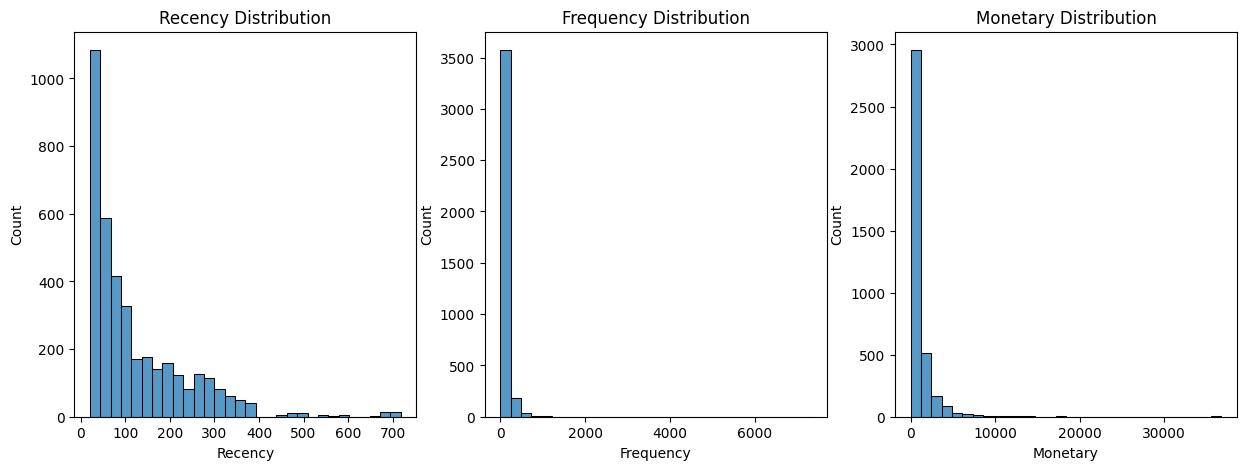

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), ncols=3)
sns.histplot(data=df_user, x='Recency', bins=30, ax=ax[0])
sns.histplot(data=df_user, x='Frequency', bins=30, ax=ax[1])
sns.histplot(data=df_user, x='Monetary', bins=30, ax=ax[2])
ax[0].set_title('Recency Distribution')
ax[1].set_title('Frequency Distribution')
ax[2].set_title('Monetary Distribution')
plt.show()

**Nhận xét:**
* Phân bố của biến **'Recency'** đa số từ khoảng 1 đến 400 (ngày kể từ lần cuối mua hàng), nhiều nhất là 1 ngày --> Tệp khách hàng mua gần đây chiếm đa số
* Phân bố của biến **'Frequency'** chủ yếu ở 1-2 (đơn hàng) --> Phần lớn khách hàng chỉ mua 1-2 đơn hàng
* Phân bố của biến **'Monetary'** chủ yếu ở khoảng dưới 1300$ --> Phần lớn khách hàng có chi tiêu thấp-trung bình

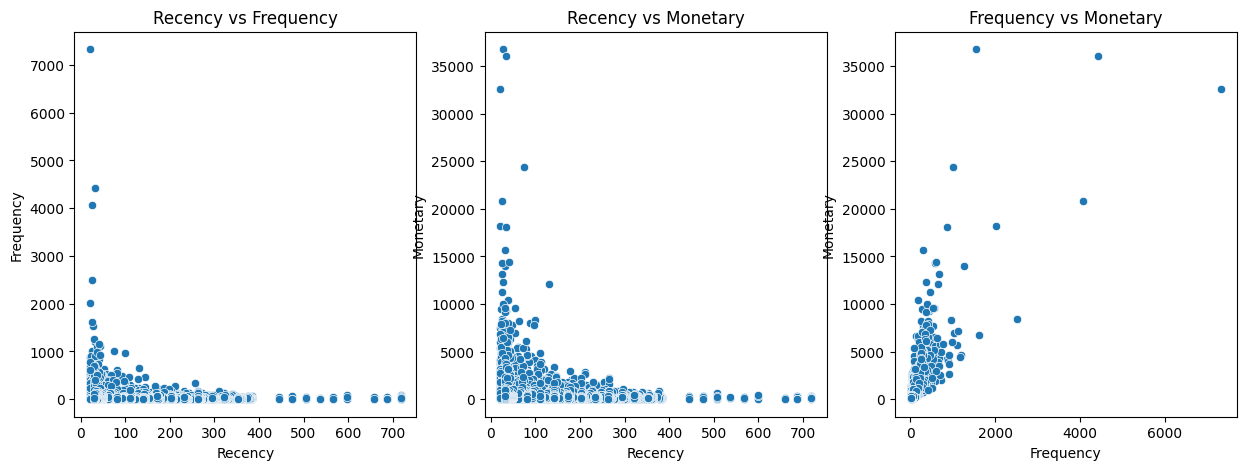

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), ncols=3)
sns.scatterplot(df_user, x='Recency', y='Frequency', ax=ax[0])
sns.scatterplot(df_user, x='Recency', y='Monetary', ax=ax[1])
sns.scatterplot(df_user, x='Frequency', y='Monetary', ax=ax[2])
ax[0].set_title('Recency vs Frequency')
ax[1].set_title('Recency vs Monetary')
ax[2].set_title('Frequency vs Monetary')
plt.show()

**Nhận xét:** Thông qua biểu đồ phân tán, ta thấy có mối liên quan giữa biến **'Frequency'** và **'Monetary'** ở mức trung bình, nghĩa là khách hàng thường xuyên mua hàng đa phần sẽ có mức chi tiêu tăng tương ứng

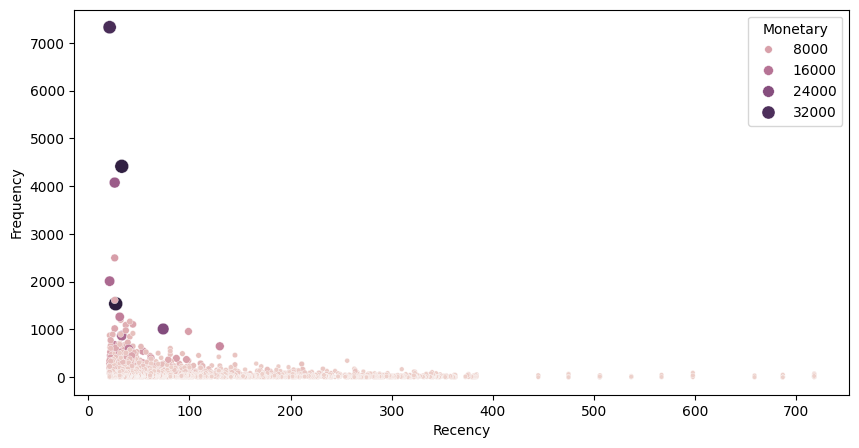

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_user, x='Recency', y='Frequency', hue='Monetary', size='Monetary', sizes=(10,100))
plt.show()

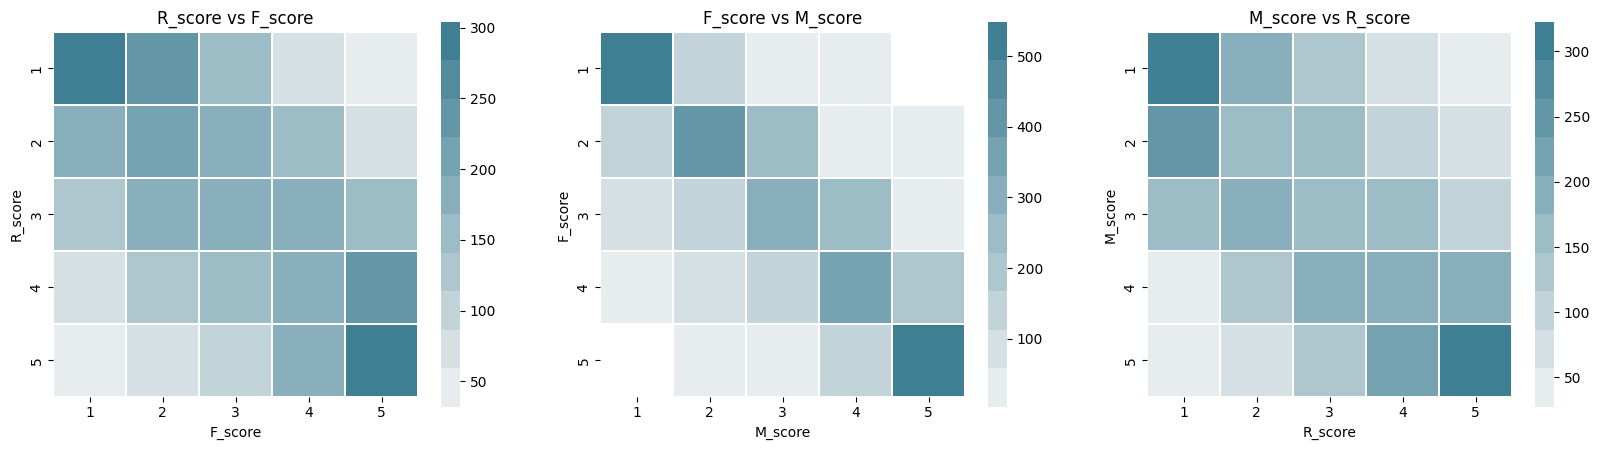

In [ ]:
df_rf = pd.DataFrame({x_label: grp['R_score'].value_counts()
                        for x_label, grp in df_user.groupby('F_score')})
df_fm = pd.DataFrame({x_label: grp['F_score'].value_counts()
                        for x_label, grp in df_user.groupby('M_score')})
df_rm = pd.DataFrame({x_label: grp['M_score'].value_counts()
                        for x_label, grp in df_user.groupby('R_score')})
fig, ax = plt.subplots(figsize=(20,5), ncols=3)
palette = sns.diverging_palette(20, 220, n=20)[10:]
# plt.figure(figsize=(10,5))
sns.heatmap(df_rf, square=True, cmap=palette, robust=True, linewidth=.2, ax=ax[0])
sns.heatmap(df_fm, square=True, cmap=palette, robust=True, linewidth=.2, ax=ax[1])
sns.heatmap(df_rm, square=True, cmap=palette, robust=True, linewidth=.2, ax=ax[2])
ax[0].set_xlabel('F_score')
ax[1].set_xlabel('M_score')
ax[2].set_xlabel('R_score')
ax[0].set_title('R_score vs F_score')
ax[1].set_title('F_score vs M_score')
ax[2].set_title('M_score vs R_score')
plt.show()

## 3.2. Distribution of Segment

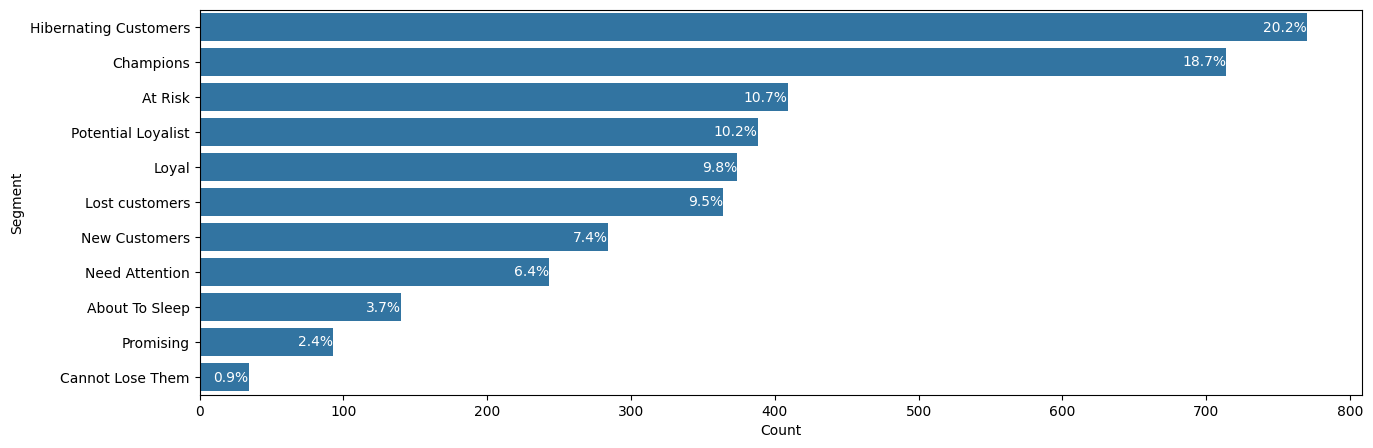

In [ ]:
segment_counts = df_user['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

plt.figure(figsize=(15,5))
ax = sns.barplot(segment_counts, x='Count', y='Segment', errorbar=None)
total = segment_counts['Count'].sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='right', va='center', color='white')
plt.show()

Segment|Charateristics|Recommendation|
:-:|:-:|:-:|
Hibernating|Đã lâu chưa mua hàng, số đơn hàng thấp nên có khả năng trở thành lost/churn customer|Tăng cường các chiến dịch marketing để kéo khách hàng quay lại mua hàng|
Champions|Thường xuyên mua hàng, số tiền chi tiêu cao|Giới thiệu các sản phẩm có giá trị cao, chương trình khách hàng thân thiết, thường xuyên update reviews từ khách hàng để cung cấp dịch vụ và sản phẩm tốt hơn|
At Risk|Đã lâu không mua hàng, nhưng từng mua và chi tiêu nhiều trong quá khứ|Giới thiệu các sản phẩm phù hợp với nhu cầu khách hàng liên quan đến các đơn hàng trong quá khứ và đang được giảm giá|



